In [2]:
import cv2
from matplotlib import pyplot as plt
%matplotlib inline
from ipywidgets import interact, interactive, fixed, interact_manual
import numpy as np
import pickle
import sqlalchemy as sql
import sys, os
import matplotlib.pyplot as plt
import argparse
from statistics import mean
import os
import pandas as pd
import numpy as np
from scipy.signal import filtfilt, butter


sys.path.append(r'C:\Users\Nicolas\Documents\GitHub\WorkScripts')


sys.path.append(r'C:\Users\Nicolas\Documents\GitHub\Scripts\Python\Librairies_Tim')
sys.path.append(r'C:\Users\Timothe\NasgoyaveOC/Professionnel/TheseUNIC/Scripts/Python/Librairies_Tim') 
from LibUtils import network, database_IO

In [6]:
connect_string = network.find_activeSQL()
sql_engine = sql.create_engine(connect_string)
rootfolder = network.find_favoritesRootFolder()

#sessions = [1454, 1461, 1502, 1516]
sessions = [1461]


trials = [] # pour le nombre total d'essais
PicklePath = []
Session=[] #contient les hits (NamePieces[0]) pour abscisse
    
    
for session_id in sessions :
    
    SessionDataFrame = database_IO.SessionDataframe( session_id , rootfolder)

    
    
    for trial, row in SessionDataFrame.iterrows():
        #print(f'taking value of trial: {trial} at { SessionDataFrame.at[trial,"BEHpath"] }') 

        if os.path.exists(SessionDataFrame.at[trial,"BEHpath"]) :
            trials.append(trial)
        else: 
            pass
    #print(trials)
    FULL_pickle_path = os.path.join( SessionDataFrame.at[ trials[0] , "PIPELINEpath" ] , "Collisions" )
    print(FULL_pickle_path)    



    for root, dirs, files in os.walk(FULL_pickle_path) :
        for file in files :
            if file.endswith('.pickles'):
                #print(file)

                name, ext = os.path.splitext(file)
                #print(name, ext)

                NamePieces = name.split("#")

                if NamePieces[2] == 'HIT' : 

                    PicklePath.append(os.path.join(FULL_pickle_path, file ))
                    Session.append(NamePieces[0])
            else : 
                pass

        
print(Session)
print(trials)

D:
Session n°1461 foldername is Mouse21_session1461_200207_2  
Session n°1461 foldername is Mouse21_session1461_200207_2  
Session n°1461 foldername is Mouse21_session1461_200207_2  
Session n°1461 foldername is Mouse21_session1461_200207_2  
DATA SELECTION IS PROBABLY WRONG OR DATAFILES ARE NOT DOWNLOADED ON DISK : BEHAVIOR FILE DON'T EQUAL EXPECTED TRIALS NUMBERS : 72 video(s) missing over 106 trials
D:DataProcessing\Expect_1\Mouse21\200207_2\Collisions
['Mouse21_session1461_200207_2_trial0', 'Mouse21_session1461_200207_2_trial23', 'Mouse21_session1461_200207_2_trial35', 'Mouse21_session1461_200207_2_trial40', 'Mouse21_session1461_200207_2_trial44', 'Mouse21_session1461_200207_2_trial5', 'Mouse21_session1461_200207_2_trial65', 'Mouse21_session1461_200207_2_trial9']
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33]


In [11]:
Ses = []
for i in Session :
    print(i)
    Ses.append(i[8:28])
print(Ses)
    

Mouse21_session1461_200207_2_trial0
Mouse21_session1461_200207_2_trial23
Mouse21_session1461_200207_2_trial35
Mouse21_session1461_200207_2_trial40
Mouse21_session1461_200207_2_trial44
Mouse21_session1461_200207_2_trial5
Mouse21_session1461_200207_2_trial65
Mouse21_session1461_200207_2_trial9
['session1461_200207_2', 'session1461_200207_2', 'session1461_200207_2', 'session1461_200207_2', 'session1461_200207_2', 'session1461_200207_2', 'session1461_200207_2', 'session1461_200207_2']


In [15]:
for elt_id, elt in enumerate(Ses):
    print(elt_id, elt)
    if elt == 'session1454_200207_1' :
        
        print(elt, elt_id)



    


#data = pd.read_pickle(os.path.join(FULL_pickle_path, file ))


#plt.imshow(image.GetImage(SessionDataFrame.at[50,"BEHpath"]))                                       
#display(SessionDataFrame)
#trial = 1

#for files in os.walk(SessionDataFrame.at[trial, 'PIPELINEpath']):
    #print(files)
    
    

0 session1461_200207_2
1 session1461_200207_2
2 session1461_200207_2
3 session1461_200207_2
4 session1461_200207_2
5 session1461_200207_2
6 session1461_200207_2
7 session1461_200207_2


In [16]:
print(PicklePath)

['D:DataProcessing\\Expect_1\\Mouse21\\200207_2\\Collisions\\Mouse21_session1461_200207_2_trial0#HitsDetection_v1#HIT.pickles', 'D:DataProcessing\\Expect_1\\Mouse21\\200207_2\\Collisions\\Mouse21_session1461_200207_2_trial23#HitsDetection_v1#HIT.pickles', 'D:DataProcessing\\Expect_1\\Mouse21\\200207_2\\Collisions\\Mouse21_session1461_200207_2_trial35#HitsDetection_v1#HIT.pickles', 'D:DataProcessing\\Expect_1\\Mouse21\\200207_2\\Collisions\\Mouse21_session1461_200207_2_trial40#HitsDetection_v1#HIT.pickles', 'D:DataProcessing\\Expect_1\\Mouse21\\200207_2\\Collisions\\Mouse21_session1461_200207_2_trial44#HitsDetection_v1#HIT.pickles', 'D:DataProcessing\\Expect_1\\Mouse21\\200207_2\\Collisions\\Mouse21_session1461_200207_2_trial5#HitsDetection_v1#HIT.pickles', 'D:DataProcessing\\Expect_1\\Mouse21\\200207_2\\Collisions\\Mouse21_session1461_200207_2_trial65#HitsDetection_v1#HIT.pickles', 'D:DataProcessing\\Expect_1\\Mouse21\\200207_2\\Collisions\\Mouse21_session1461_200207_2_trial9#HitsDetec

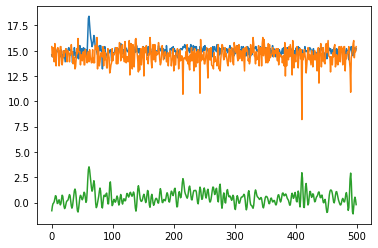

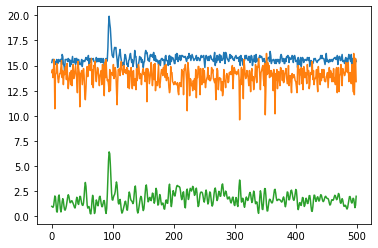

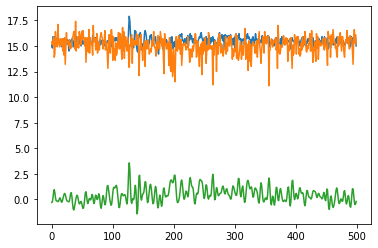

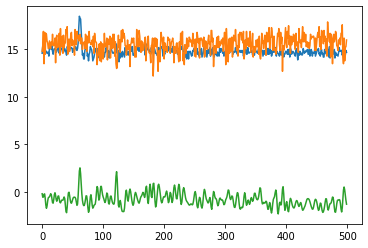

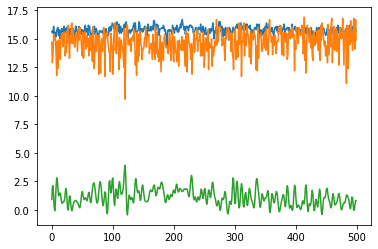

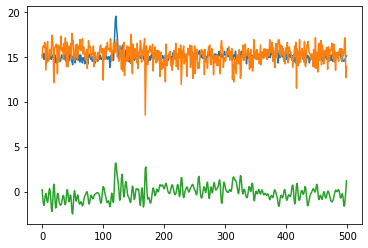

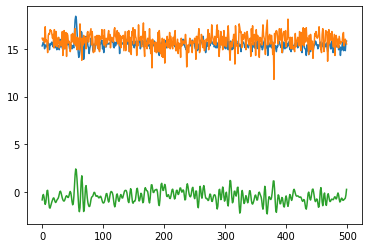

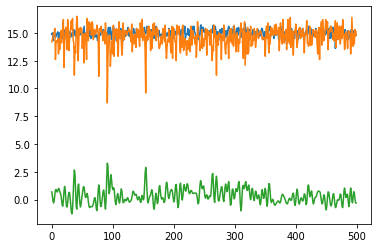

In [21]:
%matplotlib inline
for I in PicklePath :
    pickleHandle = open(I, 'rb')
    kwargs = pickle.load(pickleHandle)
    edges_Obj1 = pickle.load(pickleHandle)
    edges_Obj2 = pickle.load(pickleHandle)
    MetaEDGE_filt = pickle.load(pickleHandle)
    MetaEDGE_filtList = pickle.load(pickleHandle)
    
    plt.plot(edges_Obj1)
    plt.plot(edges_Obj2)
    plt.plot(MetaEDGE_filt)
    plt.show()

<BarContainer object of 4 artists>

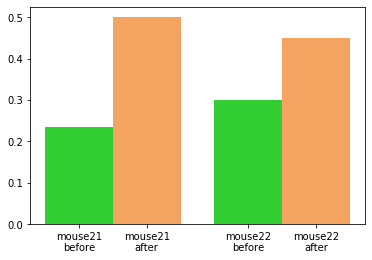

In [30]:
barWidth = 1

positions = [0,1, 2.5,3.5]
heights = [len(Ses) / len(trials),  0.5    , 0.3 , 0.45]
labels = ['mouse21\nbefore','mouse21\nafter','mouse22\nbefore','mouse22\nafter']
colors = ['limegreen','sandybrown','limegreen','sandybrown']
                                                        
                                                        
plt.bar(positions, heights, width=barWidth, tick_label = labels, color = colors)